In [4]:
#Import Library Files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
#Read CSV File

kidney_stone = pd.read_csv('kidney_stone_data.csv')

kidney_stone.head()

,treatment,stone_size,success
0,B,large,1
1,A,large,1
2,A,large,0
3,A,large,1
4,A,large,1


In [8]:
kidney_stone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 3 columns):
treatment     700 non-null object
stone_size    700 non-null object
success       700 non-null int64
dtypes: int64(1), object(2)
memory usage: 16.5+ KB


# Cleaning Data

In [12]:
#Check null value
kidney_stone.isna().sum()

treatment     0
stone_size    0
success       0
dtype: int64

In [19]:
kidney_stone.shape

(700, 3)

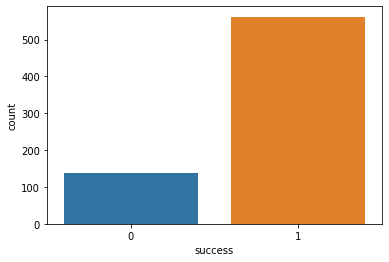

In [18]:
#Check sucess rate

sns.countplot(x=kidney_stone['success'])

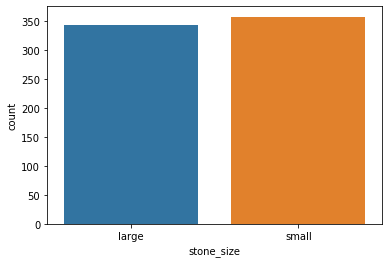

In [21]:
#Check Stone size 

sns.countplot(x=kidney_stone['stone_size'])

# Train the model

In [67]:
#Create train test

x= kidney_stone[['treatment','stone_size']]
y = kidney_stone['success']

x_dummies = pd.get_dummies(x) #Change String to Numerical 

x_train, x_test, y_train, y_test = train_test_split(x_dummies,y, test_size=0.10, random_state=0)
x_train.shape

(630, 4)

In [68]:
#Create a model

logreg =  LogisticRegression()

logreg.fit(x_train,y_train)


C:\Users\Shivam Kr. Singh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_pred = logreg.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [70]:
#Create Confusion Matrix

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 0, 12],
       [ 0, 58]], dtype=int64)

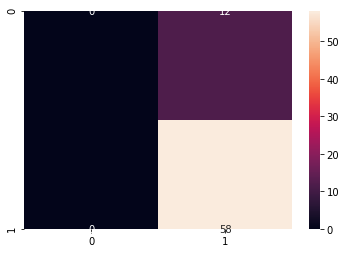

In [71]:
#Visualize Confusion Matrix

sns.heatmap(cnf_matrix, annot=True)

In [72]:
#Check Model Accurancy

print('Accuracy:' ,metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8285714285714286
Precision: 0.8285714285714286
Recall: 1.0


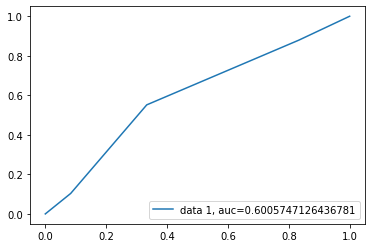

In [74]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
